## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
# Combine the data into a single dataset
combine_pd_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
combine_pd_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice=combine_pd_df['Mouse ID'].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [4]:
combine_pd_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combine_pd_df.loc[combine_pd_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_df = combine_pd_df.set_index('Mouse ID')
duplicate_df.loc['g989']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID (aka remove all records for that mouse)
clean_mouse = duplicate_df.drop(['g989'])
clean_mouse.shape
clean_mouse.count()


Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
dtype: int64

In [8]:
#Reset Mouse Id after dropping
clean_df = clean_mouse.reset_index()
clean_df['Mouse ID'].value_counts()


b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drug_regimen_mean
drug_regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_regimen_median
drug_regimen_var = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drug_regimen_var
drug_regimen_stdv = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drug_regimen_stdv
drug_regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
drug_regimen_sem


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [10]:
clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_df.groupby("Drug Regimen"). agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

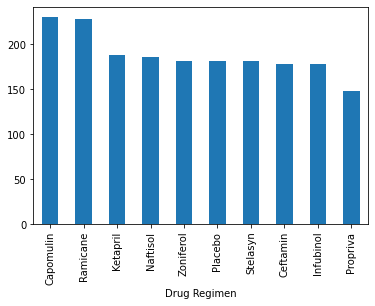

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = clean_df.groupby(['Drug Regimen'])['Timepoint'].count() 
timepoints.sort_values(ascending=False).plot.bar()  
plt.show()


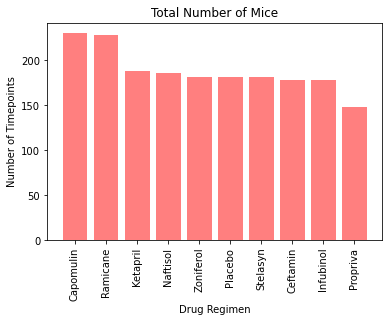

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_desc = timepoints.sort_values(ascending=False) 
plt.bar(timepoints_desc.index, timepoints_desc.values, color='r', alpha=0.5, align="center",)
plt.title('Total Number of Mice')
plt.ylabel('Number of Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:ylabel='Sex'>

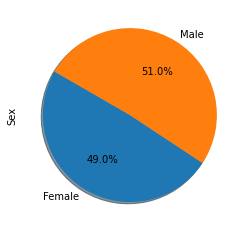

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

Gender = clean_df.groupby(['Sex'])['Sex'].count()
Gender.plot.pie(autopct="%1.1f%%", shadow=True, startangle=150)

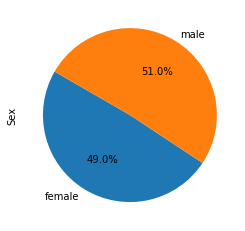

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(Gender, labels=('female', 'male'), startangle=150, autopct='%1.1f%%')
plt.ylabel('Sex') 
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_last = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
mouse_last_df = pd.DataFrame(mouse_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_mouse_df = pd.merge(clean_df, mouse_last_df, on=('Mouse ID', 'Timepoint'), how='right')
merge_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_treat = []
Ramicane_treat = []
Infubinol_treat = []
Ceftamin_treat = []
list_of_tratment_data = [[Capomulin_treat],[Ramicane_treat],[Infubinol_treat],[Ceftamin_treat]]

for index, row in merge_mouse_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        Capomulin_treat.append(row['Tumor Volume (mm3)'])
        
    elif row["Drug Regimen"] == 'Ramicane':
        Ramicane_treat.append(row['Tumor Volume (mm3)'])
        
    elif row["Drug Regimen"] == 'Infubinol':
        Infubinol_treat.append(row['Tumor Volume (mm3)'])
        
    elif row["Drug Regimen"] == 'Ceftamin':
        Ceftamin_treat.append(row['Tumor Volume (mm3)'])

list_of_tratment_data

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

[[[38.98287774,
   38.93963263,
   30.48598484,
   37.07402422,
   40.1592203,
   47.68596303,
   37.31184577,
   38.1251644,
   38.75326548,
   41.48300765,
   38.84687569,
   28.43096411,
   33.32909778,
   46.53920617,
   32.37735684,
   41.58152074,
   23.34359787,
   40.72857787,
   34.45529799,
   31.02392294,
   40.65812366,
   39.95234669,
   36.04104736,
   28.48403281,
   31.8962384]],
 [[38.4076183,
   43.0475426,
   38.81036633,
   32.97852192,
   38.34200823,
   33.39765251,
   37.31123552,
   40.65900627,
   29.12847181,
   33.56240217,
   36.37451039,
   31.56046955,
   36.13485243,
   22.05012627,
   30.56462509,
   31.09533505,
   45.22086888,
   36.56165229,
   37.22565033,
   43.41938077,
   30.27623175,
   40.66771292,
   43.16637266,
   44.18345092,
   30.63869575]],
 [[67.97341878,
   65.52574285,
   57.03186187,
   66.08306589,
   72.2267309,
   36.3213458,
   60.96971133,
   62.43540402,
   60.91876652,
   67.28962147,
   66.19691151,
   62.11727887,
   47.01036

In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 
    # add subset 
    
treatment_df = pd.DataFrame({"Capomulin": Capomulin_treat,"Ramicane": Ramicane_treat, "Infubinol": Infubinol_treat, "Ceftamin": Ceftamin_treat })
treatment_df    
    


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [19]:
# Determine outliers using upper and lower bounds
#Capomulin
quartile_cap = treatment_df["Capomulin"].quantile([.25,.5,.75])
lower_cap = quartile_cap[0.25]
upper_cap = quartile_cap[0.75]
iqr = upper_cap-lower_cap
print(f"The lower quartile of Capomulin value is: {lower_cap}")
print(f"The upper quartile of Capomulin is: {upper_cap}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of value of Cpomulin is: {quartile_cap[0.5]} ")
lower_bound_cap = lower_cap - (1.5*iqr)
upper_bound_cap = upper_cap + (1.5*iqr)
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")

The lower quartile of Capomulin value is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of value of Cpomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [20]:
# Determine outliers using upper and lower bounds
#Ramicane
quartile_ram = treatment_df["Ramicane"].quantile([.25,.5,.75])
lower_ram = quartile_ram[0.25]
upper_ram = quartile_ram[0.75]
iqr = upper_ram-lower_ram
print(f"The lower quartile of Ramicane value is: {lower_cap}")
print(f"The upper quartile of Ramicane is: {upper_cap}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of value of Ramicane is: {quartile_ram[0.5]} ")
lower_bound_ram = lower_ram - (1.5*iqr)
upper_bound_ram = upper_ram + (1.5*iqr)
print(f"Values below {lower_bound_ram} could be outliers.")
print(f"Values above {upper_bound_ram} could be outliers.")

The lower quartile of Ramicane value is: 32.37735684
The upper quartile of Ramicane is: 40.1592203
The interquartile range of Ramicane is: 9.098536719999998
The the median of value of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [21]:
# Determine outliers using upper and lower bounds
#Infubinol
quartile_infu = treatment_df["Infubinol"].quantile([.25,.5,.75])
lower_infu = quartile_infu[0.25]
upper_infu= quartile_infu[0.75]
iqr = upper_infu-lower_infu
print(f"The lower quartile of Infubinol value is: {lower_infu}")
print(f"The upper quartile of Infubinol is: {upper_infu}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol value is: {quartile_infu[0.5]} ")
lower_bound_infu = lower_infu - (1.5*iqr)
upper_bound_infu = upper_infu + (1.5*iqr)
print(f"Values below {lower_bound_infu} could be outliers.")
print(f"Values above {upper_bound_infu} could be outliers.")

The lower quartile of Infubinol value is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol value is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [22]:
# Determine outliers using upper and lower bounds
#Ceftamin
quartile_ceft = treatment_df["Ceftamin"].quantile([.25,.5,.75])
lower_ceft = quartile_ceft[0.25]
upper_ceft= quartile_ceft[0.75]
iqr = upper_ceft-lower_ceft
print(f"The lower quartile of Ceftamin value is: {lower_ceft}")
print(f"The upper quartile of Ceftamin is: {upper_ceft}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin value is: {quartile_ceft[0.5]} ")
lower_bound_ceft = lower_ceft - (1.5*iqr)
upper_bound_ceft = upper_ceft + (1.5*iqr)
print(f"Values below {lower_bound_ceft} could be outliers.")
print(f"Values above {upper_bound_ceft} could be outliers.")

The lower quartile of Ceftamin value is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin value is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


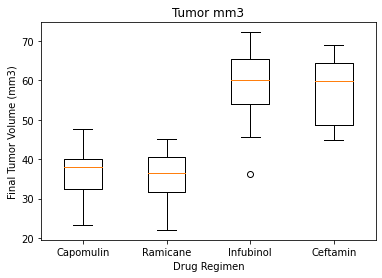

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Drugs = [Capomulin_treat, Ramicane_treat, Infubinol_treat, Ceftamin_treat]
Treamtment_regime = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor mm3')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(Drugs, labels=Treamtment_regime)
plt.show()

## Line and Scatter Plots

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = clean_df.loc[clean_df["Mouse ID"] == "b742",:]
line_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
227,b742,0,45.000000,0,Capomulin,Male,7,21
325,b742,5,41.534097,0,Capomulin,Male,7,21
676,b742,10,41.999228,0,Capomulin,Male,7,21
832,b742,15,39.524843,0,Capomulin,Male,7,21
927,b742,20,37.950355,0,Capomulin,Male,7,21
1213,b742,25,38.617684,0,Capomulin,Male,7,21
1297,b742,30,39.167949,0,Capomulin,Male,7,21
1601,b742,35,39.847576,0,Capomulin,Male,7,21
1663,b742,40,38.255627,0,Capomulin,Male,7,21
1816,b742,45,38.939633,0,Capomulin,Male,7,21


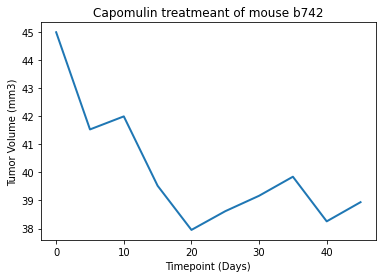

In [25]:
#line plot
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]
plt.title('Capomulin treatmeant of mouse b742')
plt.plot(x_axis, y_axis, linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('line_graph')
plt.show()

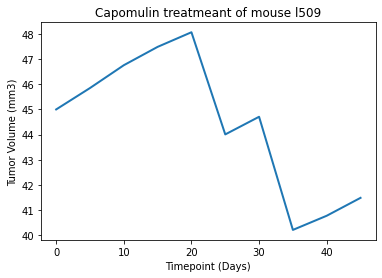

In [26]:
line_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
line_df
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis, linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('line_graph')
plt.show()

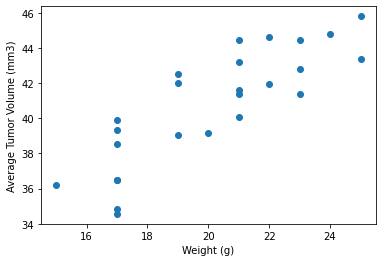

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df = clean_mouse.loc[clean_mouse["Drug Regimen"] == "Capomulin"]
scatter_avg = scatter_df.groupby(['Mouse ID']).mean()
plt.scatter(scatter_avg['Weight (g)'],scatter_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


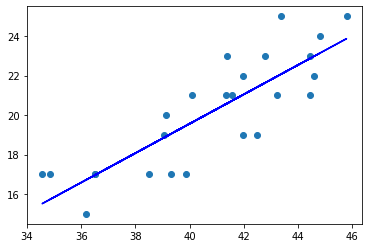

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

r=round(st.pearsonr(scatter_avg['Weight (g)'],scatter_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {r}")

correlation = st.pearsonr(scatter_avg['Tumor Volume (mm3)'],scatter_avg['Weight (g)'])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_avg['Tumor Volume (mm3)'], scatter_avg['Weight (g)'])
regress_values = scatter_avg['Tumor Volume (mm3)'] * slope + intercept

plt.scatter(scatter_avg['Tumor Volume (mm3)'], scatter_avg['Weight (g)'])
plt.plot(scatter_avg['Tumor Volume (mm3)'],regress_values,"b-")